# predict student performance

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




data = {
    "study_hours": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "attendance": [40, 45, 50, 55, 60, 65, 70, 75, 80, 85],
    "previous_marks": [35, 40, 45, 50, 55, 60, 65, 70, 75, 80],
    "result": [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}
df = pd.DataFrame(data)
df.to_csv("student_predict.csv")

# data cleaning
print(df.info())
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   study_hours     10 non-null     int64
 1   attendance      10 non-null     int64
 2   previous_marks  10 non-null     int64
 3   result          10 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes
None
study_hours       0
attendance        0
previous_marks    0
result            0
dtype: int64


In [4]:
# feature selection and split
X = df[["study_hours", "attendance", "previous_marks"]]
y = df["result"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [6]:
# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 2]]


In [7]:
pred = model.predict(pd.DataFrame([[5,50,60]], columns=["study_hours", "attendance", "previous_marks"]))


result = pred[0]

if result == 0:
    print ("fail")
else:
    print("pass")
    


pass


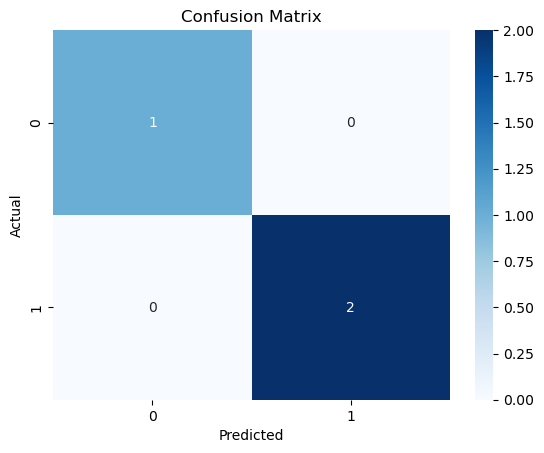

In [8]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
